In [10]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import pandas as pd

df_origin= pd.read_csv("data/temp_output.csv")
pd.set_option("display.max_columns", None)
df = df_origin.copy()
#print(df.head())
print(df.info)



<bound method DataFrame.info of        Unnamed: 0        area   price  building_state   facades  bedrooms  \
0               0  123.000000  200000            good  3.000000       2.0   
1               1  255.000000  698000  just renovated  4.000000       4.0   
2               2  234.000000  499000          as new  2.970242       5.0   
3               3  219.000000  717000          as new  2.970242       4.0   
4               4  156.000000  429000            good  4.000000       4.0   
...           ...         ...     ...             ...       ...       ...   
10053       10087  234.560062  330000  just renovated  2.970242       5.0   
10054       10088  135.000000   75000            good  2.000000       2.0   
10055       10089  107.000000  165239          as new  4.000000       2.0   
10056       10090  200.000000  580000          as new  4.000000       3.0   
10057       10091  234.560062  219000            good  2.970242       2.0   

      kitchen_equipped  furnished  open_fir

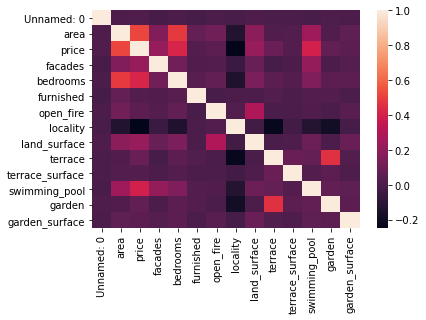

                 Unnamed: 0      area     price   facades  bedrooms  \
Unnamed: 0         1.000000  0.008424  0.012088 -0.010208  0.002777   
area               0.008424  1.000000  0.519458  0.160874  0.487949   
price              0.012088  0.519458  1.000000  0.222897  0.422251   
facades           -0.010208  0.160874  0.222897  1.000000  0.117986   
bedrooms           0.002777  0.487949  0.422251  0.117986  1.000000   
furnished         -0.013888  0.076690  0.023466  0.015390  0.036040   
open_fire          0.006095  0.116961  0.050870  0.025646  0.066557   
locality          -0.004621 -0.130595 -0.246955 -0.054209 -0.143810   
land_surface       0.008494  0.189322  0.221304  0.084804  0.141928   
terrace           -0.003210  0.011665  0.091398 -0.014474  0.054837   
terrace_surface   -0.002107  0.019294  0.024026  0.003846  0.023638   
swimming_pool     -0.006194  0.244128  0.403812  0.218873  0.153696   
garden             0.008833  0.012764  0.068513  0.005296  0.050694   
garden

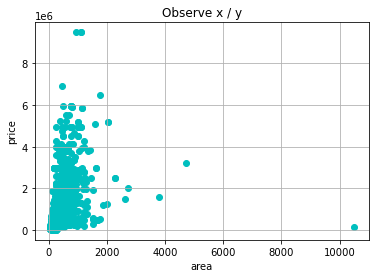

In [7]:
#correlations:
correlations = df.corr()
sns.heatmap(correlations)
plt.show()
print(correlations)

#Observe Price/area:
x = df.area
y = df.price
plt.scatter(x, y, c='c')
plt.title("Observe x / y")
plt.xlabel("area")
plt.ylabel("price")
plt.grid(True)
plt.show()
# we should remove outliers >1000000


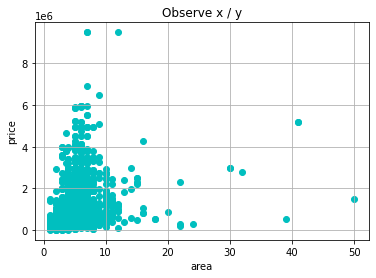

In [9]:
#Observe Price/bedroom:
x = df.bedrooms
y = df.price
plt.scatter(x, y, c='c')
plt.title("Observe x / y")
plt.xlabel("area")
plt.ylabel("price")
plt.grid(True)
plt.show()
# we should remove outliers > 20

In [14]:
#Checking missing values ("" or null),

total_na_values = df.isna().sum().sum()
print(total_na_values)# 0: no na in dataframe
#Sum of na values


0


In [11]:
#control na:
print(f'Sum of na values by columns: \n{df.isna().sum()} \n')

Sum of na values by columns: 
Unnamed: 0          0
area                0
price               0
building_state      0
facades             0
bedrooms            0
kitchen_equipped    0
furnished           0
open_fire           0
locality            0
land_surface        0
terrace             0
terrace_surface     0
swimming_pool       0
property_type       0
property_subtype    0
garden              0
garden_surface      0
dtype: int64 



In [15]:
#Drop duplicates
# a. Check for unique of data (cols)
df.duplicated()
print("Number Of Rows In The Original DataFrame:", len(df))
print("Number Of Rows After Dedupling:", len(df.drop_duplicates()))

#No duplicates

Number Of Rows In The Original DataFrame: 10058
Number Of Rows After Dedupling: 10058


In [13]:
#Observe values in each column (unique):
get_column_names = df.columns
for i in range(len(get_column_names)):    
    print(f'---Count values unique from column * {df.columns[i]} * ---: \n {df[df.columns[i]].unique()} \n')

---Count values unique from column * Unnamed: 0 * ---: 
 [    0     1     2 ... 10089 10090 10091] 

---Count values unique from column * area * ---: 
 [  123.          255.          234.          219.          156.
   140.          256.          850.          161.           61.
   160.          176.          310.          120.          170.
   182.          234.5600624    79.           70.          229.
   191.          154.          112.          240.          175.
   100.           80.          440.          537.          189.
   210.          147.          142.         1600.          130.
   129.          350.          125.          200.          235.
   180.          215.           75.          300.          127.
   173.          150.          430.          148.          166.
  1050.          149.          105.          206.          117.
   625.          179.          167.          115.          113.
   199.          192.           81.          155.          138.
   395.         